In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries loaded")

✓ Libraries loaded


In [2]:
# Load datasets
enrolment_df = pd.read_parquet('../outputs/enrolment_processed.parquet')
demographic_df = pd.read_parquet('../outputs/demographic_processed.parquet')

print(f"Data loaded: {len(enrolment_df):,} enrolment records")

Data loaded: 200,255 enrolment records


## 👶👨 Age Cohort Analysis

In [3]:
print("=" * 80)
print("AGE COHORT COMPARISON")
print("=" * 80)

# Calculate cohort totals
children_0_5 = enrolment_df['age_0_5'].sum()
youth_5_17 = enrolment_df['age_5_17'].sum()
adults_18_plus = enrolment_df['age_18_greater'].sum()
total = children_0_5 + youth_5_17 + adults_18_plus

print(f"\n📊 ENROLMENT BY AGE GROUP:")
print(f"  Children (0-5):    {children_0_5:>15,.0f}  ({children_0_5/total*100:>6.2f}%)")
print(f"  Youth (5-17):      {youth_5_17:>15,.0f}  ({youth_5_17/total*100:>6.2f}%)")
print(f"  Adults (18+):      {adults_18_plus:>15,.0f}  ({adults_18_plus/total*100:>6.2f}%)")
print(f"  Total:             {total:>15,.0f}")

# Demographic updates by age
demo_youth = demographic_df['demo_age_5_17'].sum()
demo_adult = demographic_df['demo_age_17_'].sum()
demo_total = demo_youth + demo_adult

print(f"\n🔄 DEMOGRAPHIC UPDATES BY AGE:")
print(f"  Youth (5-17):      {demo_youth:>15,.0f}  ({demo_youth/demo_total*100:>6.2f}%)")
print(f"  Adults (17+):      {demo_adult:>15,.0f}  ({demo_adult/demo_total*100:>6.2f}%)")

print("=" * 80)

AGE COHORT COMPARISON

📊 ENROLMENT BY AGE GROUP:
  Children (0-5):            713,706  ( 65.11%)
  Youth (5-17):              346,153  ( 31.58%)
  Adults (18+):               36,284  (  3.31%)
  Total:                   1,096,143

🔄 DEMOGRAPHIC UPDATES BY AGE:
  Youth (5-17):              925,608  (  9.84%)
  Adults (17+):            8,481,710  ( 90.16%)


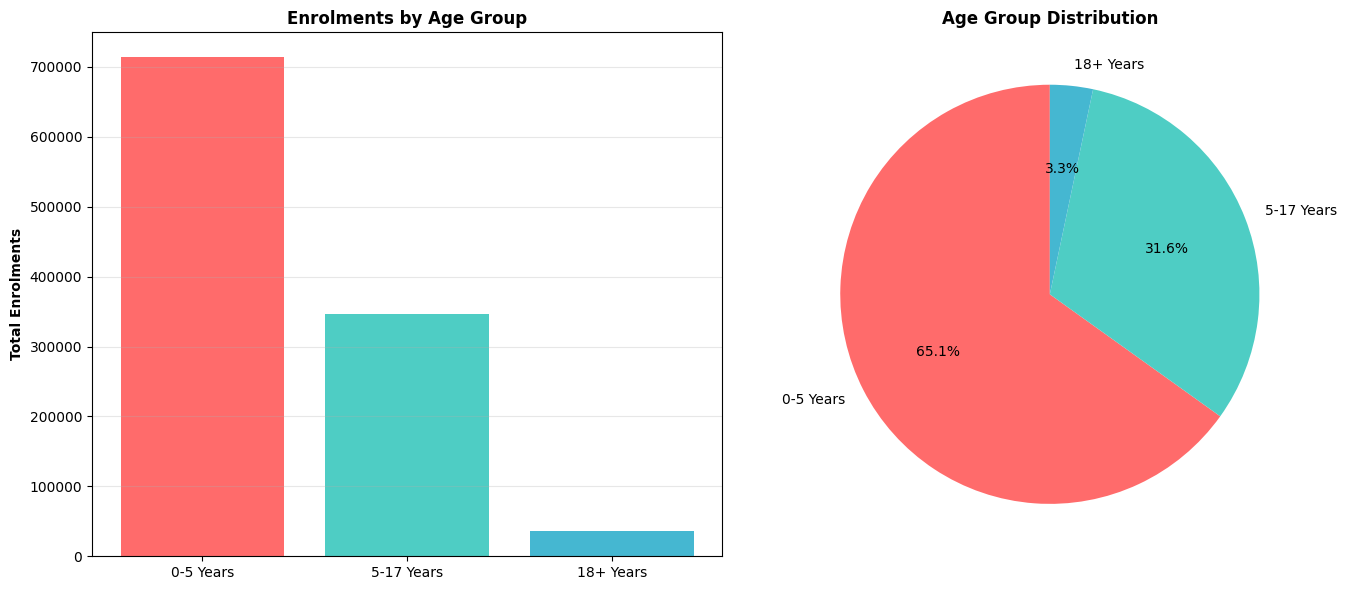

✓ Age cohort visualizations created


In [4]:
# Visualize age distribution
age_data = {
    'Age Group': ['0-5 Years', '5-17 Years', '18+ Years'],
    'Enrolments': [children_0_5, youth_5_17, adults_18_plus]
}
age_df = pd.DataFrame(age_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
ax1.bar(age_df['Age Group'], age_df['Enrolments'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_ylabel('Total Enrolments', fontweight='bold')
ax1.set_title('Enrolments by Age Group', fontweight='bold', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Pie chart
ax2.pie(age_df['Enrolments'], labels=age_df['Age Group'], autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
ax2.set_title('Age Group Distribution', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('../outputs/figures/age_cohort_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Age cohort visualizations created")

## 🗺️ Geographic Segmentation

In [5]:
# State-wise segmentation
state_segment = enrolment_df.groupby('state').agg({
    'total_enrolments': 'sum',
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum',
    'district': 'nunique'
}).reset_index()

# Calculate percentages
state_segment['pct_children'] = (state_segment['age_0_5'] / state_segment['total_enrolments'] * 100)
state_segment['pct_youth'] = (state_segment['age_5_17'] / state_segment['total_enrolments'] * 100)
state_segment['pct_adults'] = (state_segment['age_18_greater'] / state_segment['total_enrolments'] * 100)

# Top 10 states
top_10_states = state_segment.nlargest(10, 'total_enrolments')

print("\n🏆 TOP 10 STATES - AGE DISTRIBUTION:")
print("=" * 90)
print(f"{'State':<20} {'Total':>12} {'0-5 (%)':>10} {'5-17 (%)':>10} {'18+ (%)':>10} {'Districts':>10}")
print("=" * 90)

for _, row in top_10_states.iterrows():
    print(f"{row['state']:<20} {row['total_enrolments']:>12,.0f} {row['pct_children']:>10.1f} {row['pct_youth']:>10.1f} {row['pct_adults']:>10.1f} {row['district']:>10}")

print("=" * 90)


🏆 TOP 10 STATES - AGE DISTRIBUTION:
State                       Total    0-5 (%)   5-17 (%)    18+ (%)  Districts
Uttar Pradesh             204,774       51.7       46.6        1.7         85
Bihar                     120,312       43.3       54.9        1.9         47
Madhya Pradesh            101,233       74.0       24.3        1.8         60
West Bengal                76,976       72.4       25.6        2.1         41
Maharashtra                73,973       76.3       21.6        2.1         52
Rajasthan                  68,572       66.6       31.7        1.6         39
Gujarat                    53,845       69.7       24.1        6.3         39
Assam                      49,356       60.6       28.6       10.8         38
Karnataka                  46,604       78.9       16.0        5.1         53
Tamil Nadu                 43,090       82.8       16.7        0.5         44


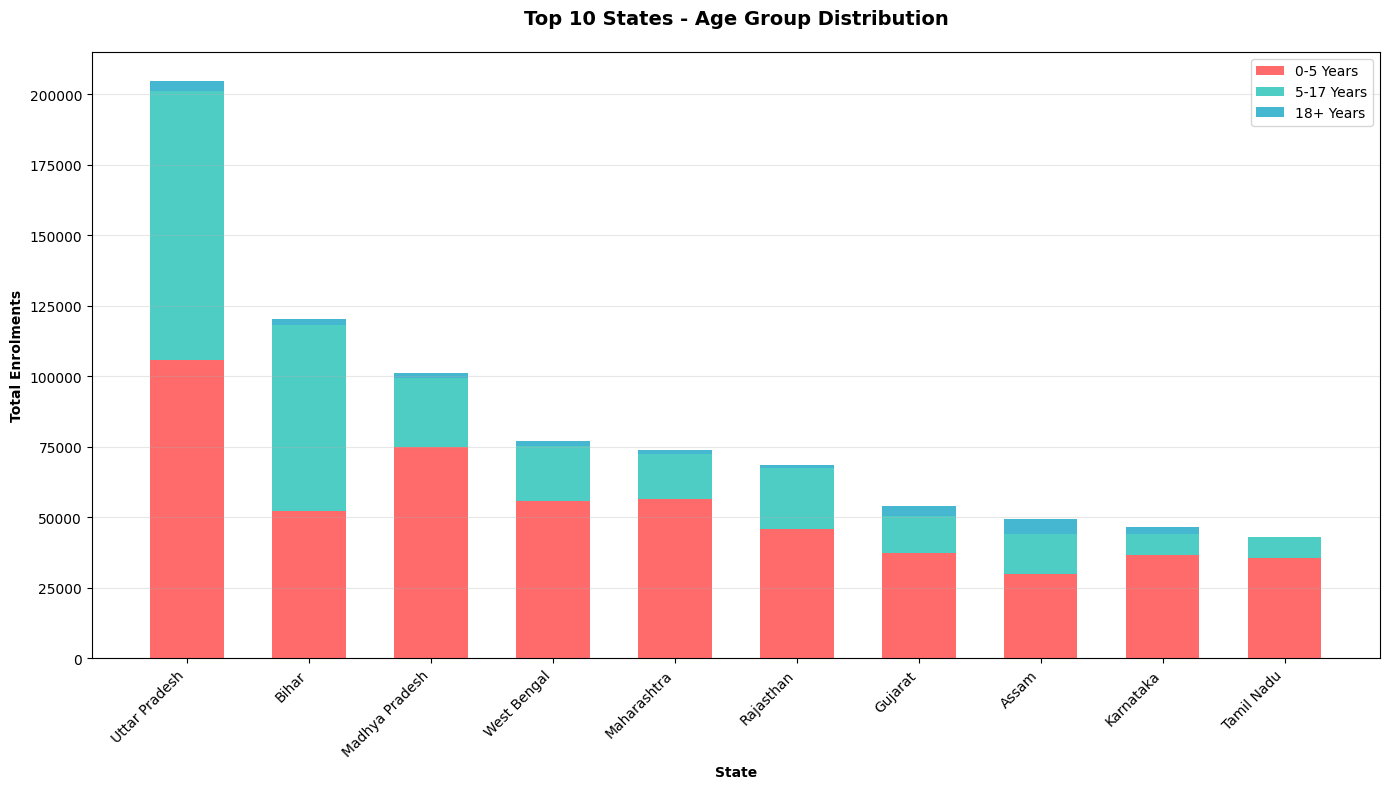

✓ Geographic segmentation visualizations created


In [6]:
# Stacked bar chart for top states
fig, ax = plt.subplots(figsize=(14, 8))

states_display = top_10_states['state'].values
children_vals = top_10_states['age_0_5'].values
youth_vals = top_10_states['age_5_17'].values
adults_vals = top_10_states['age_18_greater'].values

x = np.arange(len(states_display))
width = 0.6

ax.bar(x, children_vals, width, label='0-5 Years', color='#FF6B6B')
ax.bar(x, youth_vals, width, bottom=children_vals, label='5-17 Years', color='#4ECDC4')
ax.bar(x, adults_vals, width, bottom=children_vals+youth_vals, label='18+ Years', color='#45B7D1')

ax.set_xlabel('State', fontweight='bold')
ax.set_ylabel('Total Enrolments', fontweight='bold')
ax.set_title('Top 10 States - Age Group Distribution', fontweight='bold', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(states_display, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/state_age_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Geographic segmentation visualizations created")

## ✅ Segmentation Analysis Complete